Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning
1st Semester | AY 2024-2025
<hr> | <hr>
<u>**ACTIVITY NO. 5** | **Line and Circle Detection**
**Name** | Dela Cruz, Eugene
**Section** | CPE32S3
**Date Performed**: | 2/21/25
**Date Submitted**: |
**Instructor**: | Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to introduce students to openCV's APIs for Hough Transform.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize openCV for circle and line detection.
* Analyze the use of hough Line and Circle function for finding objects in an image.

## 3. Procedures and Outputs

Detecting edges and contours are not only common and important tasks, they also constitute the basis for other complex operations. Lines and shape detection go hand in hand with edge and contour detection, so let's examine how OpenCV implements these.

### Line Detection

The theory behind lines and shape detection has its foundation in a technique called the Hough transform, invented by Richard Duda and Peter Hart, who extended (generalized) the work done by Paul Hough in the early 1960s.

Let's take a look at OpenCV's API for the Hough transforms.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


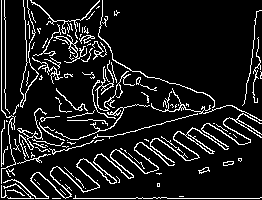

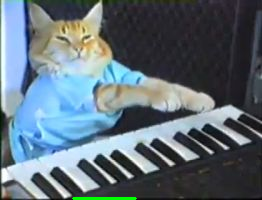

In [3]:
# Image source: https://en.wikipedia.org/wiki/Keyboard_Cat

from google.colab.patches import cv2_imshow
import cv2
import numpy as np

img = cv2.imread('/content/drive/MyDrive/CPE313 DATASET/Keyboard_cat.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,120)
minLineLength = 20
maxLineGap = 5
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,
        maxLineGap)
for x1,y1,x2,y2 in lines[0]:
  cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2_imshow(edges)
cv2_imshow(img)

The crucial point of this simple script —aside from the HoughLines function call— is the setting of minimum line length (shorter lines will be discarded) and the maximum line gap, which is the maximum size of a gap in a line before the two segments start being considered as separate lines.

Also note that the HoughLines function takes a single channel binary image, processed through the Canny edge detection filter. Canny is not a strict requirement, however; an image that's been denoised and only represents edges, is the ideal source for a Hough transform, so you will find this to be a common practice.

The parameters of HoughLinesP are as follows:
- The image we want to process.
- The geometrical representations of the lines, rho and theta, which are usually 1 and np.pi/180.
- The threshold, which represents the threshold below which a line is discarded. The Hough transform works with a system of bins and votes, with each bin representing a line, so any line with a minimum of the <threshold> votes is retained, the rest discarded.
- MinLineLength and MaxLineGap, which we mentioned previously

**Questions:**

1. Which line of code is responsible for setting the minimum line length?
2. What is the mathematical formula for Hough transform and explain how it finds lines.

**Answers:**

1. The line "minLineLength = 20" is responsible for setting the minimum line length
2. Based on my research the mathematical formula is ρ = x1 * cos(θ) + y1 * sin(θ). The Hough Transform detects lines by first applying edge detection using cv2.Canny(), which produces a binary image where edges are highlighted. The cv2.HoughLinesP() function then maps these edge points ( 𝑥 1 , 𝑦 1 ) (x 1 ​ ,y 1 ​ ) into Hough space using the equation ρ=xcosθ+ysinθ, where ρ is the perpendicular distance from the origin and θ is the angle of the normal. Votes are accumulated in this space, and the Probabilistic Hough Transform refines the process by randomly selecting edge points and checking for collinear segments. Parameters like minLineLength and maxLineGap help filter detected segments, ensuring only meaningful lines are drawn on the image using cv2.line()

### Circle Detection

OpenCV also has a function for detecting circles, called HoughCircles. It works in a very similar fashion to HoughLines, but where minLineLength and maxLineGap were the parameters to discard or retain lines, HoughCircles has a minimum distance between circles' centers, minimum, and maximum radius of the circles. Here's the obligatory example:

Before going into the sample code, check first: **What is the HoughCircles function and what are its parameters?**

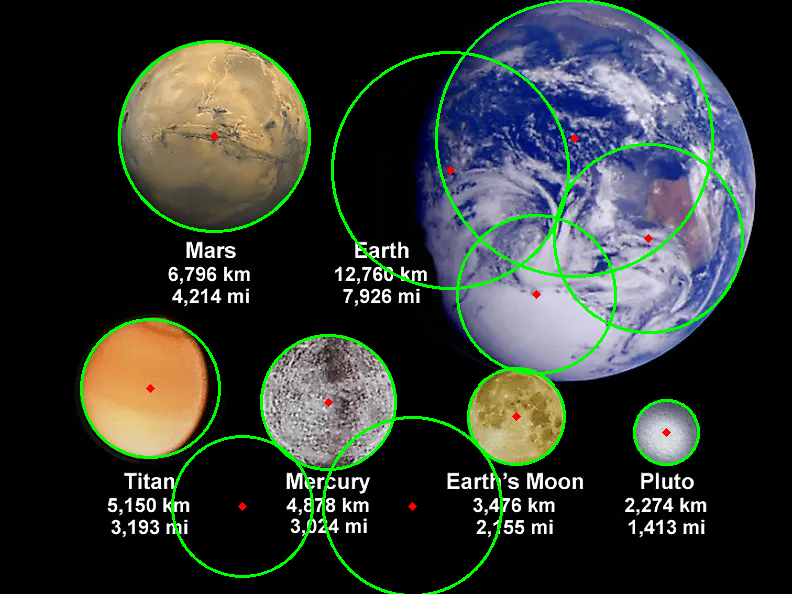

In [16]:
import cv2
import numpy as np

# Our testing value
n = 15

planets = cv2.imread('/content/drive/MyDrive/CPE313 DATASET/planets.webp')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("planets_circles.jpg", planets)
cv2_imshow(planets)

What happens to the code once you run **and the value of n is 5**?

*There are a lot of inaccurate circles which are:*
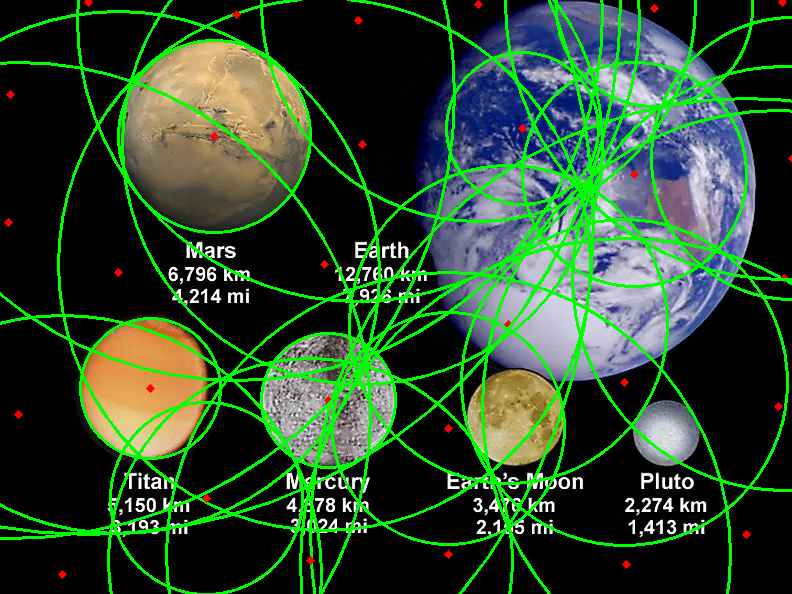

Change the value to 9, **what happens to the image**?

*The circles reduced its amount but still had inaccurate result, which some planets do not have circles around them.:*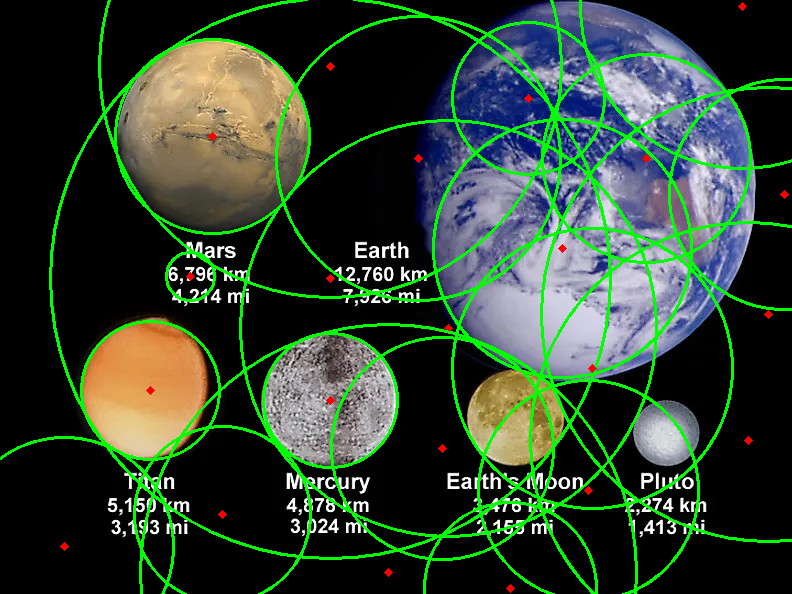

Lastly, change the value to 15, **what can you say about the resulting image?**

*All the planets were detected and had their outer circles drawn, except for Earth. This n value is the most accurate for detecting planets but has its imperfections, which resulted in four circles being drawn for it.:*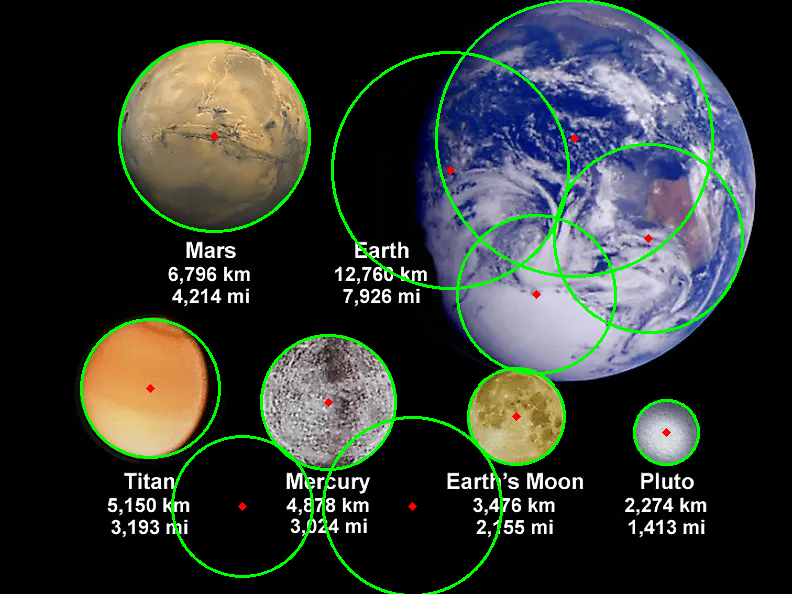

Provide an analysis of the output so far. How does the code help the changes in the resulting image?

*By changing the value of n, the blurring of the image is adjusted, which helps in detecting planets. A smaller n results in more circles being created, but with lower accuracy, while a larger n makes it easier to detect planets and reduces the number of circles in the image.*

## 4. Supplementary Activity

The attached image contains coins used in the Philippines.

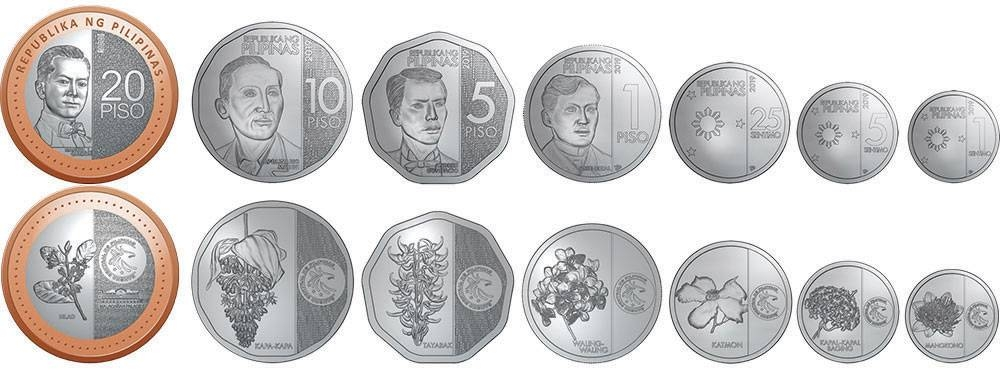

Your job is to count the amount of coins (denomation not included, no sum of prices; just the amount of coins present) through either line detection or circle detection.

- Create a function using line detection and pass this image as parameter, what is the output? Can you use houghlines to count circles?
- Create a function using circle detection and pass this image as parameter, show the output? Can you use houghcircles to count the circles?

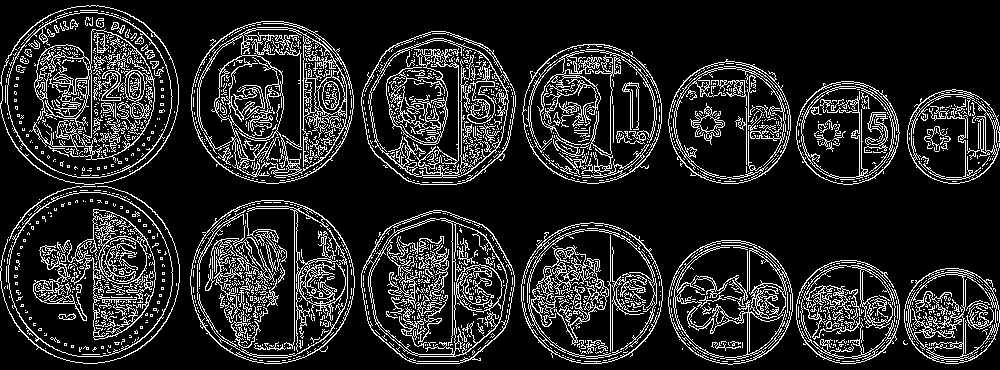

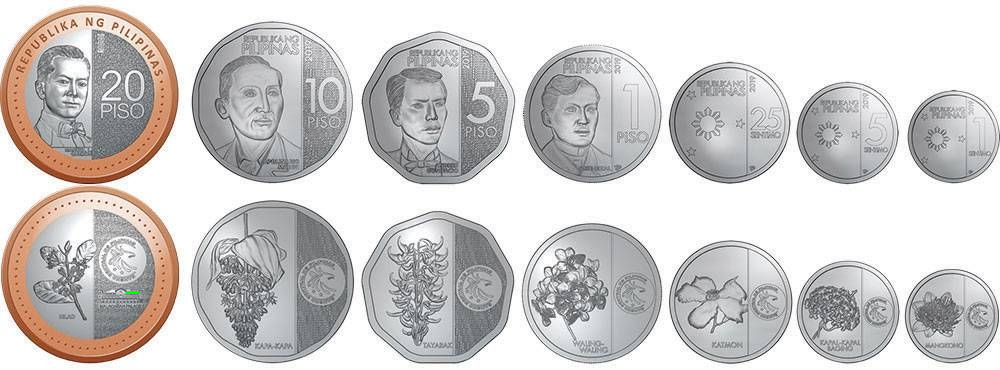

In [17]:
img = cv2.imread('/content/drive/MyDrive/CPE313 DATASET/coins.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,120)
minLineLength = 20
maxLineGap = 5
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,
        maxLineGap)
for x1,y1,x2,y2 in lines[0]:
  cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2_imshow(edges)
cv2_imshow(img)

*HoughLines cannot be reliably used for counting circles because it is designed to detect straight lines, not curved shapes. However, depending on the image, it may appear to detect circles. In this case, the algorithm detects multiple tangent or intersecting lines along the circular edges, creating an illusion of a full circle. The imperfections seen around the circles are due to the way lines are detected at different edge points, causing gaps or overlapping segments instead of a smooth curve.*

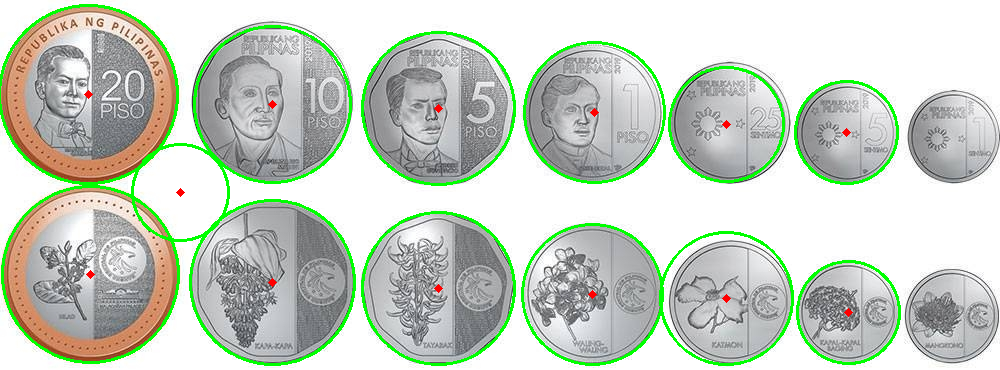

In [26]:
coins = cv2.imread('/content/drive/MyDrive/CPE313 DATASET/coins.jpg')
gray_img = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, 15) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(coins,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(coins,(i[0],i[1]),2,(0,0,255),3)

cv2_imshow(coins)

*Yes, HoughCircles can be used to count circles because it is specifically designed to detect circles in an image. However, it has its imperfections. For example, in my output, it did not fully detect all the coins— the 1-cent coin was not detected at all, and the 25-centavo coin had inaccuracies in both its radius and alignment to the coin's center. It also has random circle in the middle of 20 peso and 10 peso coins*

## 5. Summary, Conclusions and Lessons Learned

The activity explores line and circle detection using OpenCV's Hough Transform APIs, guiding participants through the use of HoughLinesP for detecting lines in an image of a cat and HoughCircles for identifying circles in an image of planets. It provides hands-on coding exercises and explanations of key parameters, emphasizing the importance of edge detection as a preprocessing step. The activity shows how parameters such as minimum line length, maximum line gap, and circle-related thresholds influence detection accuracy. The Hough Transform is a powerful technique for detecting geometric shapes in images, with OpenCV's implementation's results when parameters are carefully adjusted. Through this activity, participants will develop a deeper understanding of the mathematical principles behind the Hough Transform, the role of edge detection, and the significance of parameter tuning. Ultimately, the activity demonstrates the practical application of these techniques in computer vision, reinforcing the importance of preprocessing and careful parameter selection for accurate shape detection.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*